In [1]:
import glob
import pickle
import matplotlib.pyplot as plt

In [2]:
with open("data/monotonicity/master_df_parsed_15.pickle", "rb") as f:
    df15 = pickle.load(f)
    
with open("data/monotonicity/master_df_parsed_150.pickle", "rb") as f:
    df150 = pickle.load(f)

In [3]:
df15.equals(df150)

False

In [4]:
with open("data/monotonicity/master_df_parsed_15.pickle", "rb") as f:
    df = pickle.load(f)
    
parm_names = [r'$c$',
 r'$\exp(\sigma_f)$',
 r'$\exp(\sigma_m)$',
 r'$\exp(\sigma_e)$',
 r'$r$',
 r'$\mu_L$',
 r'$\sigma_L$',
 r'$q$',
 r'$h_{max}$',
 r'$d$',
 r'$p$',
 'dummy']

In [5]:
df['speciation_bool'] = df['speciation_ybp'].notna()
df['speciation_ybp'] = 30000 - df['speciation_ybp']
df.groupby(['mate_pref', 'food_scheme'])['max_streak'].mean()

mate_pref  food_scheme
False      constant        11.442000
           increasing      11.510667
True       constant       109.454667
           increasing     233.437667
Name: max_streak, dtype: float64

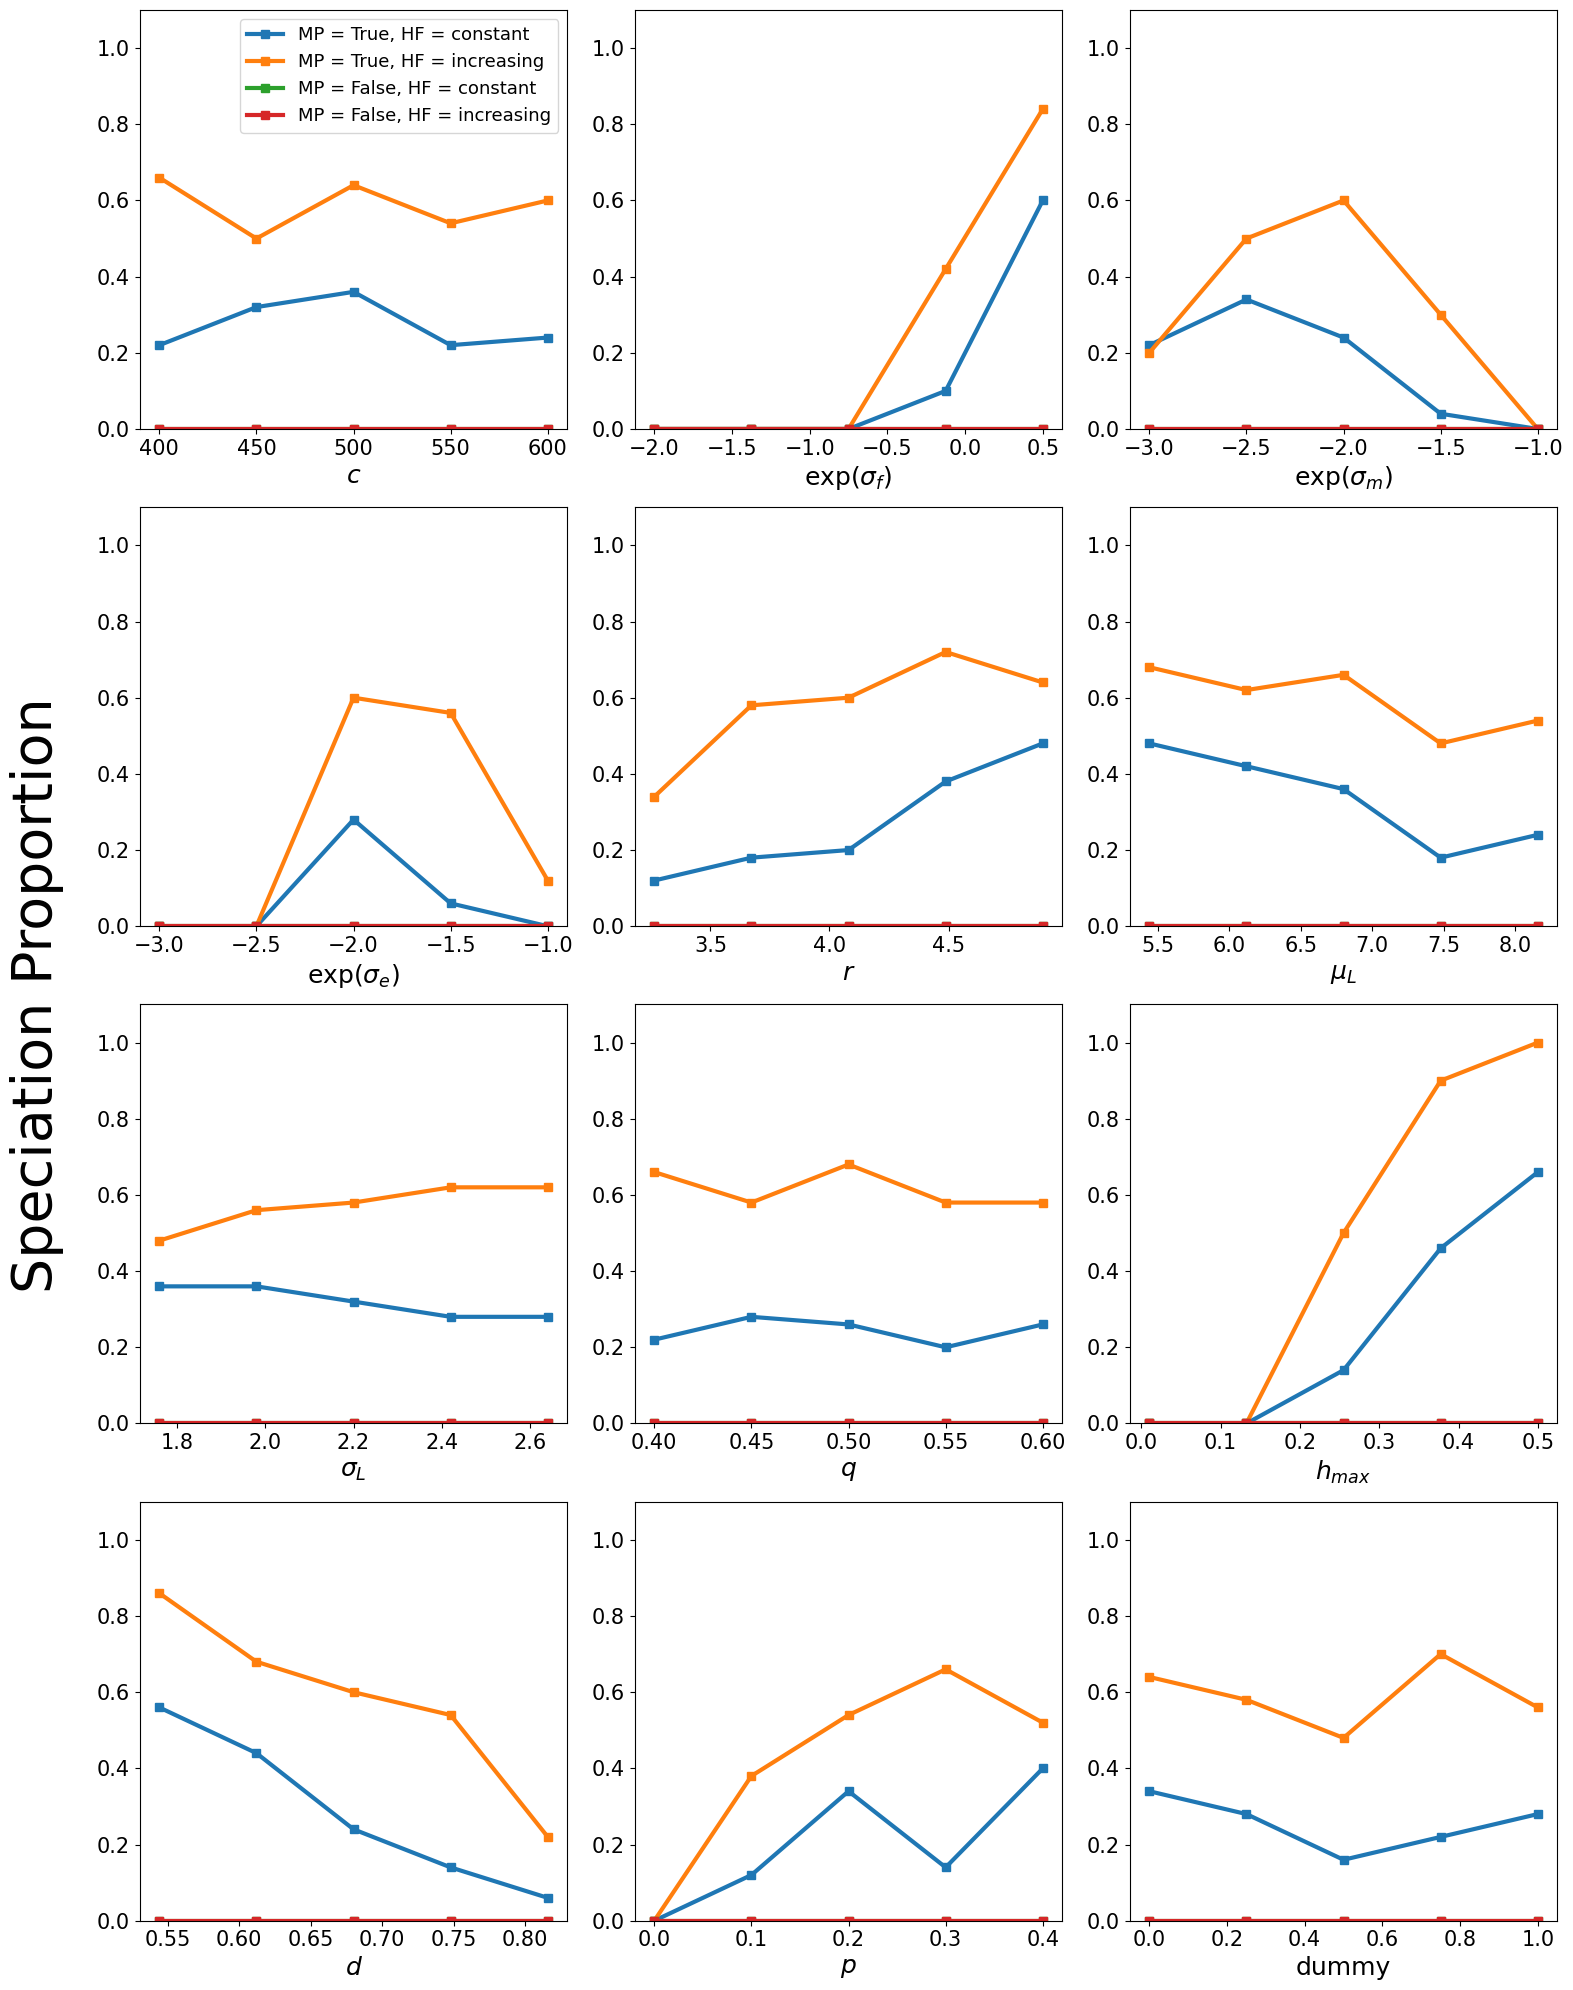

In [10]:
fig, ax = plt.subplots(4, 3, figsize = (15, 20))

# iterate over the parameters. 
for n, param in enumerate(df['adj_parm'].unique()):
    row = n // 3; col = n % 3
    
    # subset to reps where this param is changing. 
    sub_df = df[df['adj_parm'] == param]
    
    # for each mate preference/human food combination we need to construct a curve
    for mate_pref in [True, False]:
        for food_scheme in ['constant', 'increasing']:
            sub_df2 = sub_df[(sub_df['mate_pref'] == mate_pref) & (sub_df['food_scheme'] == food_scheme)]
            sub_df2.groupby(param)['speciation_bool'].mean().plot(kind='line', marker='s', ax = ax[row, col], linewidth = 3, label = "MP = " + str(mate_pref) + ', HF = ' + food_scheme)
            ax[row, col].set_ylim(0, 1.1)
            ax[row, col].set_xlabel(parm_names[n], fontsize=18)
            ax[row, col].tick_params(axis='both', labelsize=15)

        
ax[0, 0].legend(fontsize=13)
fig.text(-0.03,0.5, "Speciation Proportion", ha="center", va="center", rotation=90, fontsize=40)
fig.tight_layout()
fig.savefig('figures/monotonicity/mono_speciation_perc_15.pdf', bbox_inches='tight')

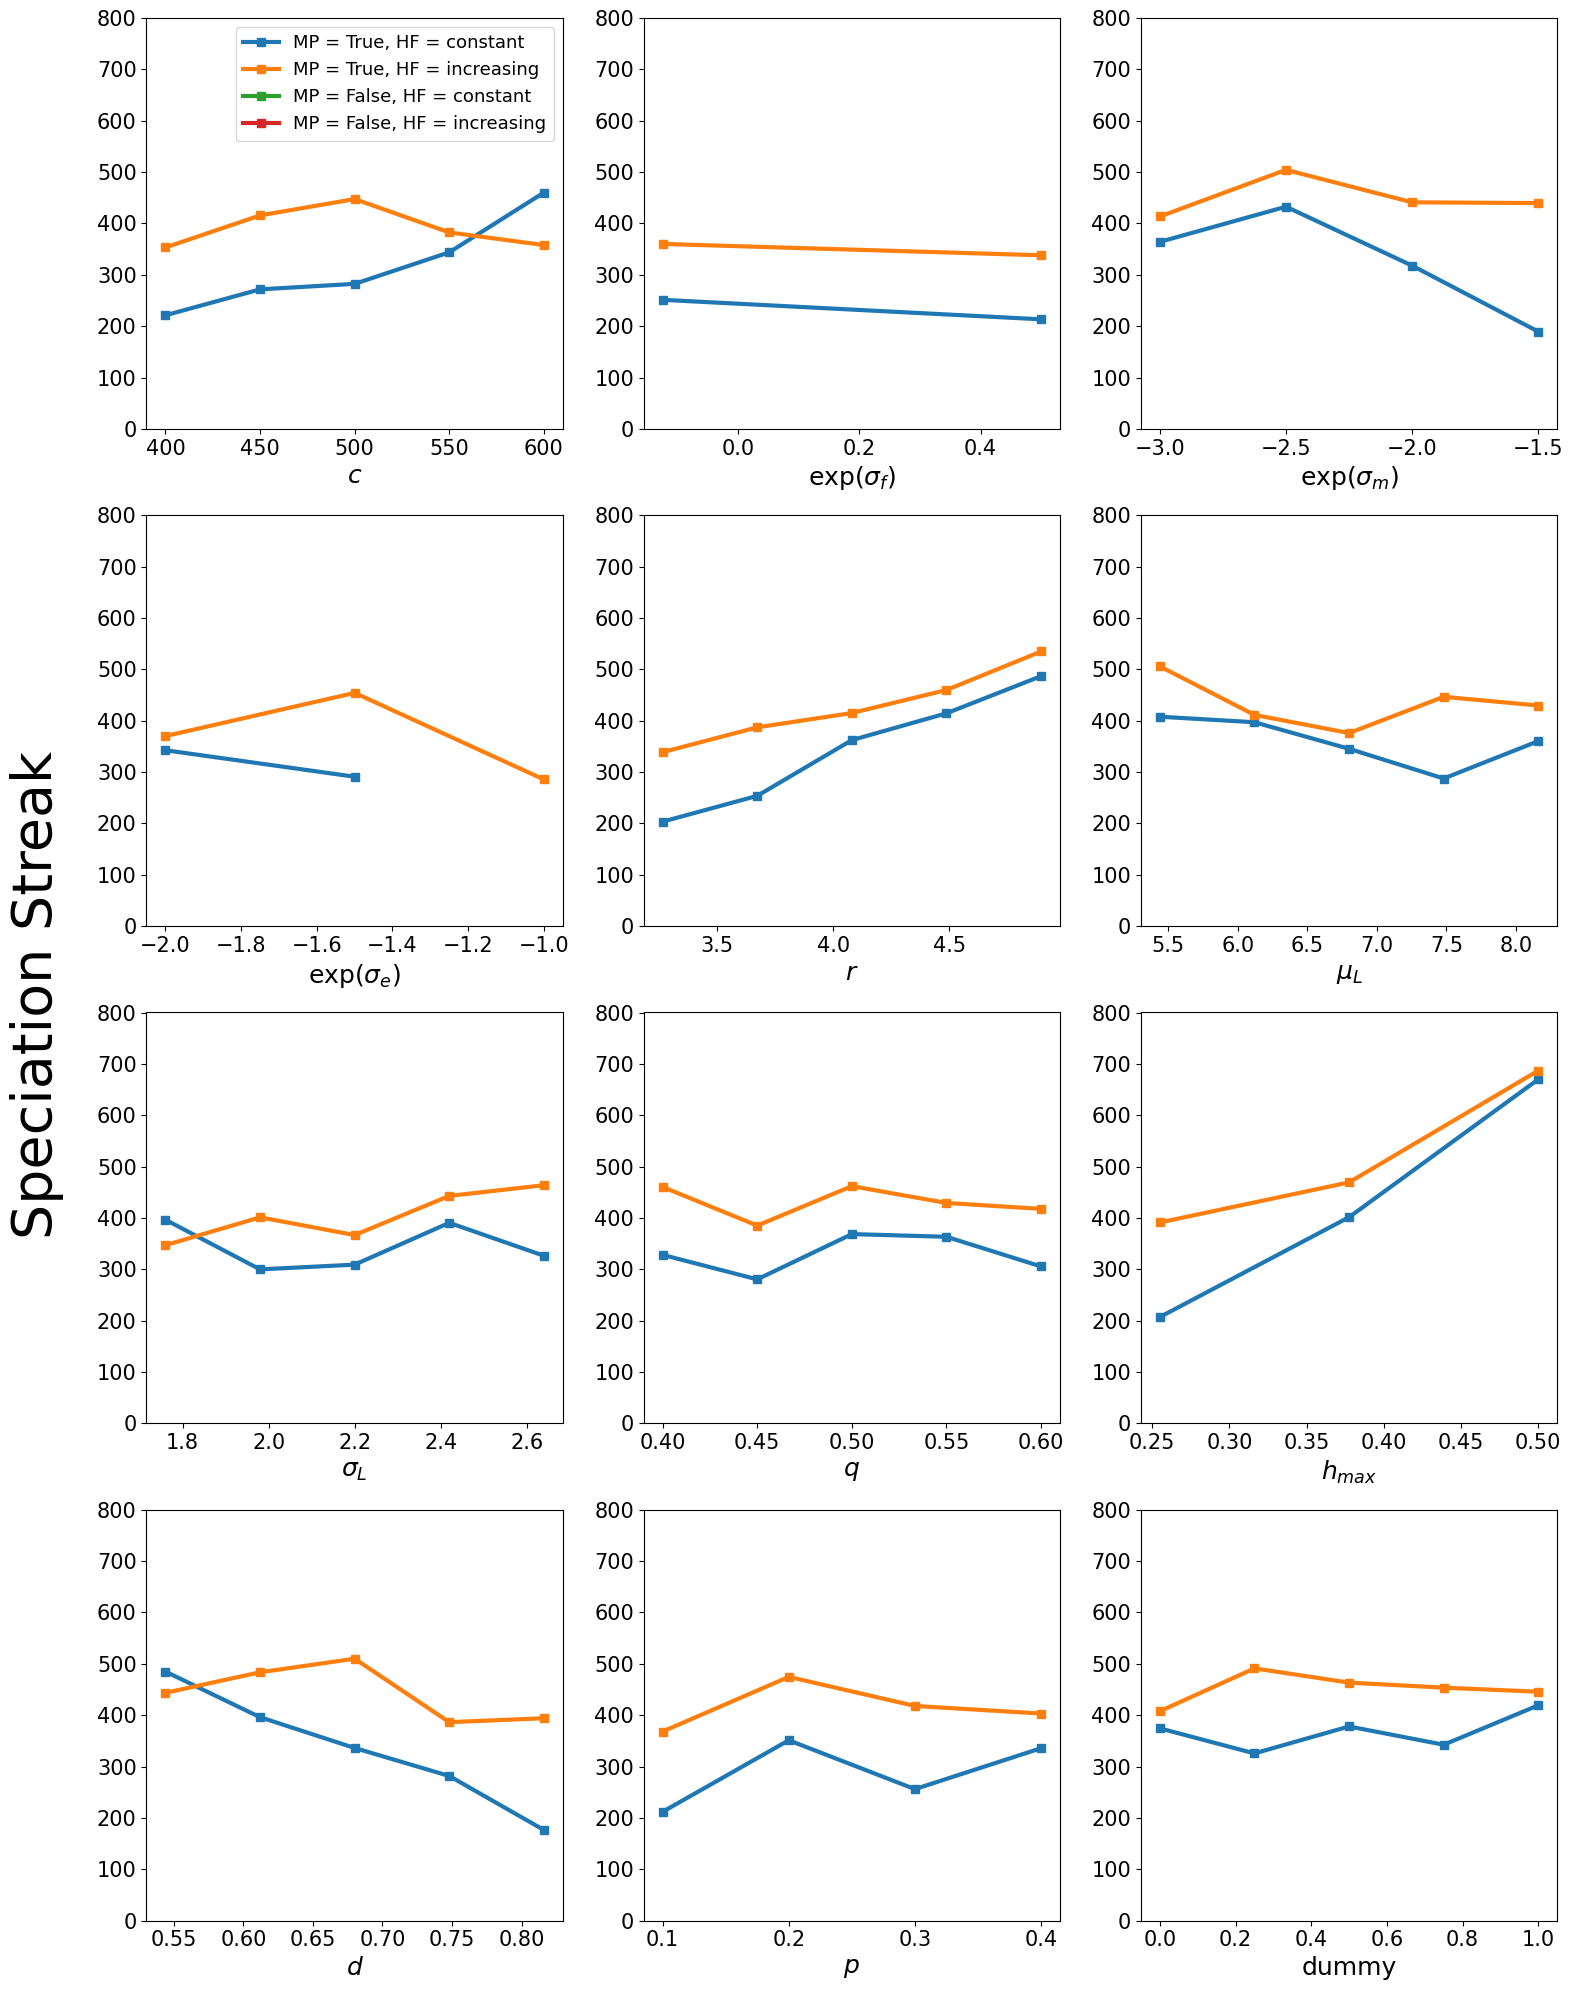

In [11]:
fig, ax = plt.subplots(4, 3, figsize = (15, 20))

# iterate over the parameters. 
for n, param in enumerate(df['adj_parm'].unique()):
    row = n // 3; col = n % 3
    
    # subset to reps where this param is changing. 
    sub_df = df[df['adj_parm'] == param]
    
    # for each mate preference/human food combination we need to construct a curve
    for mate_pref in [True, False]:
        for food_scheme in ['constant', 'increasing']:
            sub_df2 = sub_df[(sub_df['mate_pref'] == mate_pref) & (sub_df['food_scheme'] == food_scheme)]
            sub_df3 = sub_df2[sub_df2['speciation_bool']] 
            sub_df3.groupby(param)['max_streak'].mean().plot(kind='line', marker='s', ax = ax[row, col], linewidth = 3, label = "MP = " + str(mate_pref) + ', HF = ' + food_scheme)
            ax[row, col].set_ylim(0, 800)
            ax[row, col].set_xlabel(parm_names[n], fontsize=18)
            ax[row, col].tick_params(axis='both', labelsize=15)

ax[0, 0].legend(fontsize=13)
fig.text(-0.03,0.5, "Speciation Streak", ha="center", va="center", rotation=90, fontsize=40)
fig.tight_layout()
fig.savefig('figures/monotonicity/mono_speciation_streak_15.pdf', bbox_inches='tight')

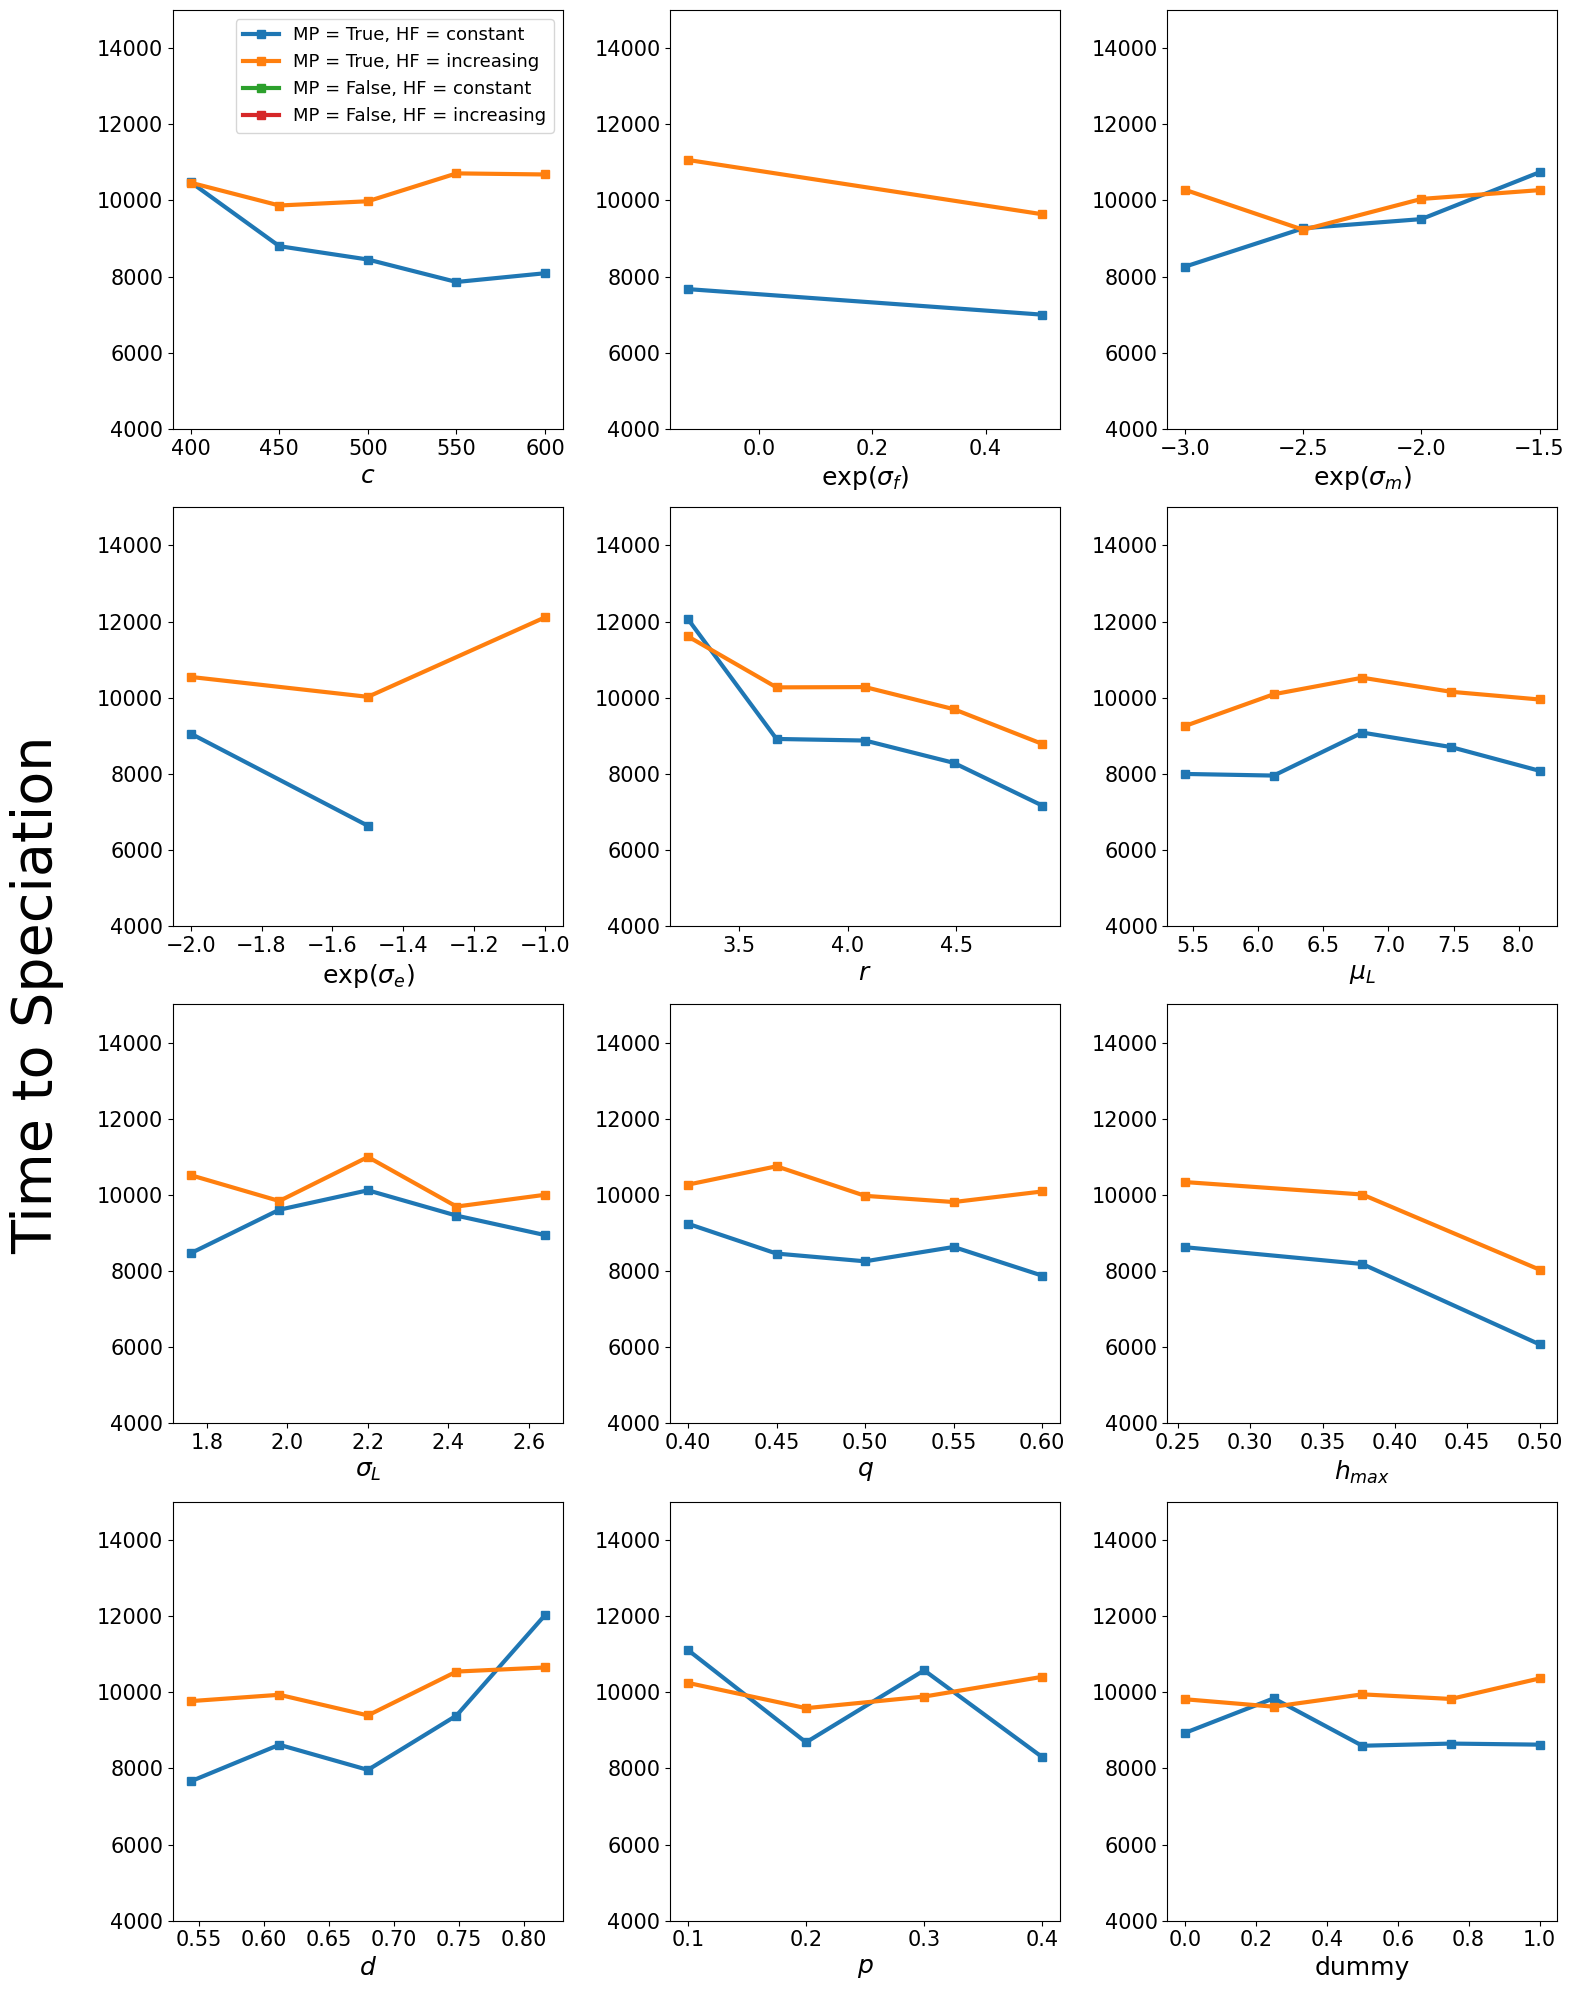

In [12]:
fig, ax = plt.subplots(4, 3, figsize = (15, 20))

# iterate over the parameters. 
for n, param in enumerate(df['adj_parm'].unique()):
    row = n // 3; col = n % 3
    
    # subset to reps where this param is changing. 
    sub_df = df[df['adj_parm'] == param]
    
    # for each mate preference/human food combination we need to construct a curve
    for mate_pref in [True, False]:
        for food_scheme in ['constant', 'increasing']:
            sub_df2 = sub_df[(sub_df['mate_pref'] == mate_pref) & (sub_df['food_scheme'] == food_scheme)]
            sub_df3 = sub_df2[sub_df2['speciation_bool']] 
            sub_df3.groupby(param)['speciation_ybp'].mean().plot(kind='line', marker='s', ax = ax[row, col], linewidth = 3, label = "MP = " + str(mate_pref) + ', HF = ' + food_scheme)
            ax[row, col].set_ylim(4000, 15000)
            ax[row, col].set_xlabel(parm_names[n], fontsize=18)
            ax[row, col].tick_params(axis='both', labelsize=15)

ax[0, 0].legend(fontsize=13)
fig.text(-0.03,0.5, "Time to Speciation", ha="center", va="center", rotation=90, fontsize=40)
fig.tight_layout()
fig.savefig('figures/monotonicity/mono_time_to_speciation_15.pdf', bbox_inches='tight')